<a href="https://colab.research.google.com/github/LordMelodias/Data-Analytics/blob/main/textprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Written Data Prediction

Builds a neural network to recognize handwritten digits from the MNIST dataset. This dataset contains images of digits (0 through 9) that are used to train and test the model’s ability to classify these digits. The workflow involves data preprocessing, model construction, training, evaluation, and visualization of predictions.

# Import Library

In [37]:
import pandas as pd

In [38]:
import numpy as np

In [39]:
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset

In [40]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [42]:
# Load the MNIST dataset, which contains 70,000 grayscale images of handwritten digits (from 0 to 9).
# This dataset contains pre-split training and testing data.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [43]:
# image pixel values from a range of 0-255
# Dividing by 255.0 changes the pixel values to a 0-1 scale, which helps the model learn better.
X_train, X_test = X_train / 255.0, X_test / 255.0

In [44]:
# Artificial Neural Networks (ANNs) typically require input data to be in a one-dimensional format (a vector),
# so when dealing with 2D data like images (which are 28x28 pixels), we need to reshape it into a 1D array
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Build the ANN model

In [45]:
from tensorflow.keras import layers, models

In [46]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # input layer
    layers.Dense(64, activation='relu'),                       # hidden layer
    layers.Dense(10, activation='softmax')                     # output layer is 10 because there are (0 to 9) possibilities
])

In [47]:
# Compile the model
# "sparse_categorical_crossentropy" Used when labels are integers (e.g. classifying images into multiple categories where labels are integers).
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8776 - loss: 0.4196 - val_accuracy: 0.9624 - val_loss: 0.1247
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9654 - loss: 0.1114 - val_accuracy: 0.9693 - val_loss: 0.0948
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9781 - loss: 0.0713 - val_accuracy: 0.9765 - val_loss: 0.0817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9842 - loss: 0.0509 - val_accuracy: 0.9753 - val_loss: 0.0827
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9878 - loss: 0.0382 - val_accuracy: 0.9764 - val_loss: 0.0801


In [49]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

313/313 - 0s - 2ms/step - accuracy: 0.9764 - loss: 0.0801

Test accuracy: 97.64%


In [50]:
# Predict the first 5 images in the test set
predictions = model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


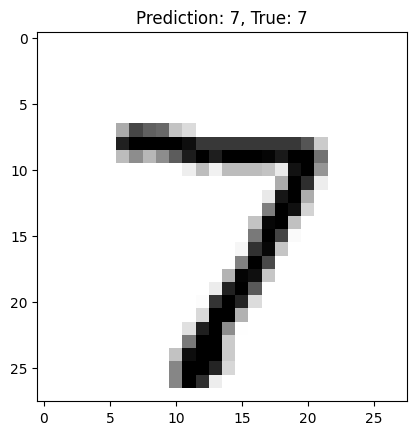

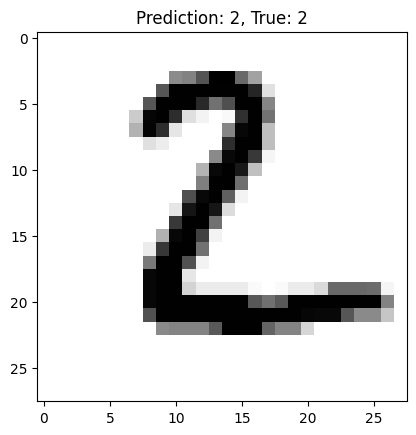

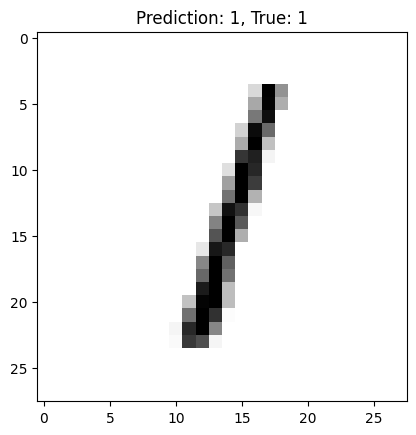

In [51]:
# Display the first 5 test images, predicted labels, and true labels
for i in range(3):
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Prediction: {predictions[i].argmax()}, True: {y_test[i]}')
    plt.show()
